In [37]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import desimodel.io
import desimodel.focalplane
%matplotlib inline

In [3]:
sv_data = Table.read("/project/projectdirs/desi/target/catalogs/dr9d/PRnone/targets/sv/resolve/bright/sv1-targets-dr9-hp-X.fits")

In [6]:
sv_data[:5]

RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,RA_IVAR,DEC,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_EPOCH,WISEMASK_W1,WISEMASK_W2,MASKBITS,LC_FLUX_W1 [13],LC_FLUX_W2 [13],LC_FLUX_IVAR_W1 [13],LC_FLUX_IVAR_W2 [13],LC_NOBS_W1 [13],LC_NOBS_W2 [13],LC_MJD_W1 [13],LC_MJD_W2 [13],SHAPE_R,SHAPE_E1,SHAPE_E2,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,PHOTSYS,TARGETID,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL
int16,int32,str8,int32,str4,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,int16,int16,float64,float64,float32,float32,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float64,float32,float32,float32,float32,float32,float32,str1,int64,int64,int64,int64,float64,int64,int64,int64,int64
9001,519393,1601p347,7,EXP,160.09780751654338,1437547500000.0,34.62719462595381,1604714100000.0,34259.133 .. 59193.81,0.016881276,53.06386,12.608733,457.92017,0.08809576,0.034753233,0.32099432,0.95125604,0.9668983,0.98134726,24.28466,221.03996,7.729443,0.96733433,0.94522053,0.8945868,1.0000002,1.0,0.7463395,2,2,6,0.0,0.0,0.0,0.0,0.0,0.0,-182.5657,-123.66031,394.3154,8919.996,3.3455825,0.62291205,0.0008732918,1.1518226e-05,0.9971432,0.9982446,0.9996254,0.9998585,2,2,2,19.862864,4.719701,171.40866,740.265,1693.0325,2001.6913,0.0,130,128,3068,-2034.8323 .. 0.0,-942.7949 .. 0.0,0.29831037 .. 0.0,0.07585045 .. 0.0,14 .. 0,13 .. 0,55332.835814765 .. 0.0,55332.835814765 .. 0.0,0.794875,-0.014447446,-0.053486247,4270654.5,4951683.0,4403524.5,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,39588995138584583,1152921504606846976,2056,0,0.7711840984536714,4,2000,1,5331
9001,519393,1601p347,19,DEV,160.2081471729696,2500183000000.0,34.63049163005599,2439282200000.0,153183.14 .. 210344.67,0.018163566,7.479974,39.907806,89.646706,68.253235,12.383219,23.243439,0.9476521,0.9644292,0.9799447,0.0023902107,0.0032801765,0.04475713,0.036510743,0.039590787,0.03454342,0.995173,0.99544907,0.82899183,2,2,5,471.0476,69.36107,284.82666,303.26926,54.37627,139.82901,148.87311,91.492546,-0.51589555,-719.0182,2.2521763,0.43815595,0.00067331764,9.358504e-06,0.99692655,0.99811137,0.9995969,0.99984777,0,0,0,1.9025872,10.150848,22.802309,1.9025877,10.150851,22.802315,0.0,0,0,0,155.52248 .. 0.0,98.21576 .. 0.0,0.20930465 .. 0.0,0.054900397 .. 0.0,13 .. 0,13 .. 0,55332.835814765 .. 0.0,55332.835814765 .. 0.0,1.5504575,0.029096976,-0.012007851,29259.29,109821.305,54889.207,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,39588995138584595,1152921504607633433,514,0,0

In [7]:
r = np.random.random(len(sv_data))

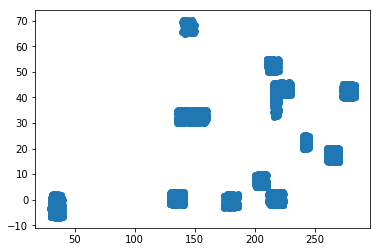

In [10]:
ii = r<0.001
plt.scatter(sv_data['RA'][ii], sv_data['DEC'][ii])

In [11]:
sky_data = Table.read("/project/projectdirs/desi/target/catalogs/dr8/0.31.0/skies/skies-dr8-0.31.0.fits")

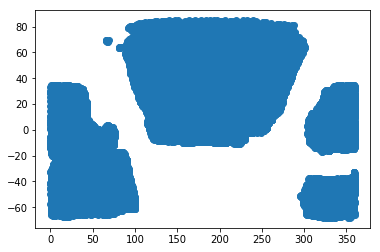

In [13]:
n_sky = len(sky_data)
q = np.random.random(n_sky)
qq = q<0.001
plt.scatter(sky_data['RA'][qq], sky_data['DEC'][qq])

# Gama field G12
Imaging: DECaLS - Non-DES  
174<ra<186  
-3.0<dec<+2.0  
Area: 60 deg2  
Truth map for BGs, HSC photo-z  
Different depth, interesting for ELG systematics  
Gama field G15  

In [18]:
min_ra = 174.0
max_ra = 186.0
min_dec = -3.0
max_dec = +2.0
ii_sv = (sv_data['RA']>min_ra) & (sv_data['RA']<max_ra) & (sv_data['DEC']>min_dec) & (sv_data['DEC']<max_dec)
ii_sky = (sky_data['RA']>min_ra) & (sky_data['RA']<max_ra) & (sky_data['DEC']>min_dec) & (sky_data['DEC']<max_dec)

254634


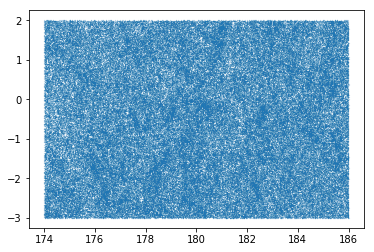

In [23]:
plt.scatter(sv_data['RA'][ii_sv], sv_data['DEC'][ii_sv], s=0.01)
print(np.count_nonzero(ii_sv))

311040


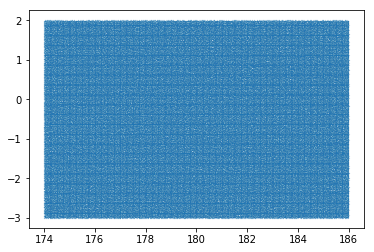

In [22]:
plt.scatter(sky_data['RA'][ii_sky], sky_data['DEC'][ii_sky], s=0.01)
print(np.count_nonzero(ii_sky))

In [26]:
desi_tiles = desimodel.io.load_tiles()

In [35]:
ii_tiles = (desi_tiles['PROGRAM']=='BRIGHT') & (desi_tiles['PASS']==5)
ii_tiles &= (desi_tiles['RA']>min_ra) & (desi_tiles['RA']<max_ra)
ii_tiles &= (desi_tiles['DEC']>min_dec) & (desi_tiles['DEC']<max_dec)

In [38]:
def plot_sky_circle(x, y, radius, alpha=0.2):
    theta = np.linspace(0, 2*np.pi, 50)
    xx = x + np.cos(np.radians(y))*radius*np.cos(theta)
    yy = y + radius*np.sin(theta)
    plt.fill(xx, yy, alpha=alpha)

def plot_tile(ra, dec, alpha=0.2):
    tile_radius = desimodel.focalplane.get_tile_radius_deg()
    plot_sky_circle(ra, dec, tile_radius)

def plot_tiles(tiles):
    for i in range(len(tiles)):
        plot_tile(tiles['RA'][i], tiles['DEC'][i])
    plt.xlabel('RA [degrees]')
    plt.ylabel('dec [degrees]')

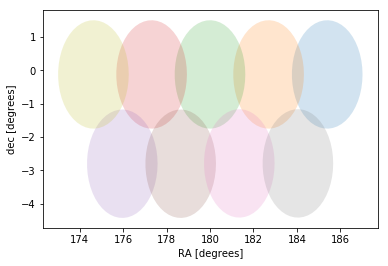

In [47]:
gama_tiles = desi_tiles[ii_tiles]
plot_tiles(gama_tiles)

In [48]:
radius = desimodel.focalplane.get_tile_radius_deg()

In [81]:
ra_center = np.arange(0.5+min_ra+radius, max_ra-radius, 2.4*radius)
dec_center = np.arange(0.5+min_dec+radius, max_dec-radius, 1.5*radius)
print(ra_center)
print(dec_center)

[176.12748108 180.03343566 183.93939025]
[-0.87251892]


In [82]:
i = 0 
for ra_c in ra_center:
    for dec_c in dec_center:
        gama_tiles['RA'][i] = ra_c
        gama_tiles['DEC'][i] = dec_c
        i += 1

In [87]:
gama_tiles = Table(gama_tiles[:i])

In [88]:
gama_tiles

TILEID,RA,DEC,PASS,IN_DESI,EBV_MED,AIRMASS,STAR_DENSITY,EXPOSEFAC,PROGRAM,OBSCONDITIONS
int32,float64,float64,int16,int16,float32,float32,float32,float32,str6,int32
28949,176.12748107675844,-0.8725189232415653,5,1,0.024772212,1.2218989,1539.824,1.4936615,BRIGHT,4
30868,180.03343566097868,-0.8725189232415653,5,1,0.02221236,1.2218989,1541.5647,1.470578,BRIGHT,4
30869,183.93939024519892,-0.8725189232415653,5,1,0.023612155,1.2218989,1690.6482,1.4831562,BRIGHT,4


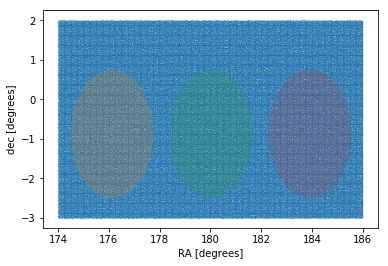

In [89]:
plt.scatter(sky_data['RA'][ii_sky], sky_data['DEC'][ii_sky], s=0.01)
plot_tiles(gama_tiles)

In [ ]:
sky_data[ii_sky].write('sky_gama_g12.fits', overwrite=True)
sv_data[ii_sv].write('targets_gama_g12.fits', overwrite=True)
gama_tiles.write('tiles_gama_g12.fits', overwrite=True)